<a href="https://colab.research.google.com/github/moshehaimlevi/dectree1/blob/main/dectree1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0
Confusion Matrix:
 [[3 0]
 [0 3]]
Classification Report:
               precision    recall  f1-score   support

           A       1.00      1.00      1.00         3
           B       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



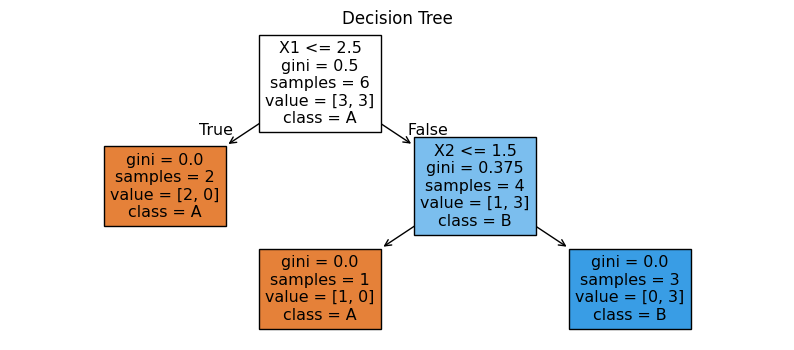


Tree Nodes:
Node 0:
  Gini Impurity: 0.5000
  Samples: 6
  Class Counts: {np.str_('A'): 0, np.str_('B'): 0}
  Predicted Class: A
------------------------------
Node 1:
  Gini Impurity: 0.0000
  Samples: 2
  Class Counts: {np.str_('A'): 1, np.str_('B'): 0}
  Predicted Class: A
------------------------------
Node 2:
  Gini Impurity: 0.3750
  Samples: 4
  Class Counts: {np.str_('A'): 0, np.str_('B'): 0}
  Predicted Class: B
------------------------------
Node 3:
  Gini Impurity: 0.0000
  Samples: 1
  Class Counts: {np.str_('A'): 1, np.str_('B'): 0}
  Predicted Class: A
------------------------------
Node 4:
  Gini Impurity: 0.0000
  Samples: 3
  Class Counts: {np.str_('A'): 0, np.str_('B'): 1}
  Predicted Class: B
------------------------------


In [3]:
X = np.array([
    [1, 3],
    [2, 1],
    [3, 2],
    [4, 3],
    [5, 1],
    [6, 2]
])

y = np.array(['A', 'A', 'B', 'B', 'A', 'B'])


clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X, y)

# Predictions
y_pred = clf.predict(X)

# Metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='macro')
recall = recall_score(y, y_pred, average='macro')
f1 = f1_score(y, y_pred, average='macro')
cm = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

print("Accuracy:", accuracy)
print("Precision (macro):", precision)
print("Recall (macro):", recall)
print("F1 Score (macro):", f1)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)


plt.figure(figsize=(10, 4))
plot_tree(clf, feature_names=["X1", "X2"], class_names=clf.classes_, filled=True)
plt.title("Decision Tree")
plt.show()

# Tree details
print("\nTree Nodes:")
for i, (impurity, samples, value) in enumerate(zip(clf.tree_.impurity, clf.tree_.n_node_samples, clf.tree_.value)):
    class_counts = dict(zip(clf.classes_, map(int, value[0])))
    predicted_class = clf.classes_[np.argmax(value)]
    print(f"Node {i}:")
    print(f"  Gini Impurity: {impurity:.4f}")
    print(f"  Samples: {samples}")
    print(f"  Class Counts: {class_counts}")
    print(f"  Predicted Class: {predicted_class}")
    print("-" * 30)